<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys

In [0]:
def shuffle_data(X, y, seed=None):
  #concatenate x and y for random shuffle
  X_y = np.concatenate((X, y.reshape(len(y), 1)), axis=1)
  if seed:
    np.ramdom.seed(seed)
  np.random.shuffle(X_y)
  X = X_y[:, :-1] #every col except last
  y = X-y[:, -1]  #every last col
  return X, y

In [0]:
def train_test_split(X, y, test_size=0.5, seed=None):
  if seed:
    X, y = shuffle_data(X, y, seed)
  split = len(y) - int(len(y)//(1/test_size))
  train_X, test_X = X[:split], X[split:]
  train_y, test_y = y[:split], y[split:]
  return train_X, test_X, train_y, test_y

In [0]:
def mean_square_error(y, label):
  return np.mean(np.power(y-label, 2))

In [0]:
def standardize(X):
  mean = X.mean(axis=0)
  std = X.std(axis=0)
  X_std = X
  for col in range(np.shape(X)[1]):
    if(std[col]):
      X_std[:, col] = (X_std[:, col] - mean[col])/std[col]
  return X_std

In [0]:
def normalize(X, axis=-1, order=2):
  l2=np.atleast_1d(np.linalg.norm(X, order, axis))
  l2[l2==0] = 1
  return X/np.expand_dims(l2, axis)

In [0]:
def sigmoid(X):
  return 1/(1 + np.exp(-X))

In [0]:
def accuracy_score(y, pre_y):
  score=0
  for i in range(len(y)):
    if y[i] == pre_y[i]:
      score = score + 1
  return score/len(y)
    

In [0]:
# Return the variance of the features in dataset X
def calculate_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance

In [0]:
# Calculate the covariance matrix for the dataset X
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
    if not Y.any():
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(0)).T.dot(Y - Y.mean(0))

    return np.array(covariance_matrix, dtype=float)
 
# Calculate the correlation matrix for the dataset X
def calculate_correlation_matrix(X, Y=np.empty((0,0))):
    if not Y.any():
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

[Log regression objective function
](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

[Derivative of cost function](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)

In [0]:
class LogisticRegression():
  def __init__(self, n_iter, learning_rate):
    self.n_iter = n_iter
    self.learning_rate = learning_rate
    
  def fit(self, X, y):
    num_features = np.shape(X)[1]
    self.w = np.zeros(num_features)
    label = self.predict(X)
    for i in range(self.n_iter):
      w_gradient = X.T.dot(X.dot(self.w) - y)
      self.w -= self.learning_rate*X.T.dot(label - y)

  
  def predict(self, X):
    y_pred = X.dot(self.w) 
    return np.round(sigmoid(y_pred)).astype(int)
  

(150, 4)
(150,)
Accuracy: 0.16666666666666666


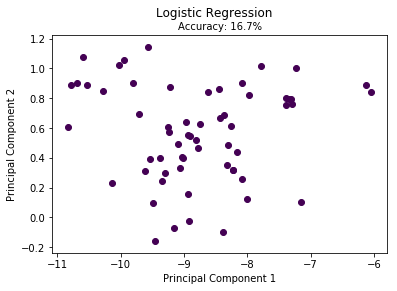

In [48]:
def main():
  data = datasets.load_iris()
  X, y = data.data, data.target
  print(np.shape(X))
  print(np.shape(y))
  #X = normalize(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  clf = LogisticRegression(4000, 0.01)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  
  print ("Accuracy:", accuracy)

  # Reduce dimension to two using PCA and plot the results
  pca = PCA()
  pca.plot_in_2d(X_test, y_pred, title="Logistic Regression", accuracy=accuracy)

if __name__ == "__main__":
    main()

In [0]:
from __future__ import print_function
import sys
import os
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np

class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and 
    maximizing the variance along each feature axis. This class is also used throughout
    the project to plot data.
    """
    def __init__(self): pass

    # Fit the dataset to the number of principal components
    # specified in the constructor and return the transformed dataset
    def transform(self, X, n_components):
        covariance = calculate_covariance_matrix(X)

        # Get the eigenvalues and eigenvectors.
        # (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed

    def get_color_map(self, N):
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color

    # Plot the dataset X and the corresponding labels y in 2D using PCA.
    def plot_in_2d(self, X, y=None, title=None, accuracy=None, legend_labels=None):
        X_transformed = self.transform(X, n_components=2)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        class_distr = []

        y = np.array(y).astype(int)

        # Color map
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

        # Plot the different class distributions
        for i, l in enumerate(np.unique(y)):
            _x1 = x1[y == l]
            _x2 = x2[y == l]
            _y = y[y == l]
            class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

        # Plot legend
        if not legend_labels is None: 
            plt.legend(class_distr, legend_labels, loc=1)

        # Plot title
        if title:
            if accuracy:
                percent = 100 * accuracy
                plt.suptitle(title)
                plt.title("Accuracy: %.1f%%" % percent, fontsize=10)
            else:
                plt.title(title)

        # Axis labels
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        plt.show()

    # Plot the dataset X and the corresponding labels y in 3D using PCA.
    def plot_in_3d(self, X, y=None):
        X_transformed = self.transform(X, n_components=3)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        x3 = X_transformed[:, 2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x1, x2, x3, c=y)
        plt.show()
